# Ficticious Employee Dataset 

In [1]:
# Import and Load necessary Libraries

import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


### Create the inputs to be used

In [2]:
id_number = ['123', '274', '675', '908', '874', '435', '3976', '111', '873', '097', '435', '999', '012', '87443', '567', \
            '888', '64329']
fname = ['patrick', 'amanda', 'edward', 'john', 'lekan', 'nneka', 'uche', 'promise', \
         'chuka','chisom', 'booboo', 'kiki', 'chikaodi', 'linda', 'oluchi', 'lopez', 'conrad']
lname = ['eze', 'ify', 'onoro', 'wick', 'scanty', 'elizabeth', 'williams', 'ejimi', \
         'segun','benny', 'rica', 'omeili', 'steve', 'ejiofor', 'amadi', 'benjamin', 'lilo']
division = ['sales', 'IT', 'marketing', 'administration', 'sales', 'administration','marketing', 'IT', \
            'sales', 'engineering','IT', 'engineering', 'IT', 'sales', 'marketing', 'IT', 'administration']
salary = [21665, 45786, 78654, 18904, 65439, 12480, 97450, 15000, 52100, 87000, 78000, \
          45632, 26960, 32100, 74980, 3000, 18000]
phone_number = ['7366578', '7366435', '7366765', '7366098', '7366004', '7366511', \
                '7366375', '7366798', '7366012', '7366099', '7366599', '7366217', \
                '7366001','7366086', '7366542', '7366222', '7366989']
contract_type = ['permanent', 'permanent', 'temporary', 'internship', 'temporary', \
                 'permanent', 'permanent', 'temporary', 'permanent', 'permanent', 'temporary', \
                 'temporary', 'permanent', 'permanent', 'internship', 'temporary', 'internship']

# print(len(id_number))
# print(len(fname))
# print(len(lname))
# print(len(division))
# print(len(salary))
# print(len(phone_number))
# print(len(contract_type))

In [3]:
employees = pd.DataFrame({'fname': fname, 'lname': lname, 'division': division, \
                          'salary': salary, 'phone_number': phone_number, 'contract_type': contract_type}, index= id_number)

employees.sample(7)

,fname,lname,division,salary,phone_number,contract_type
675,edward,onoro,marketing,78654,7366765,temporary
888,lopez,benjamin,IT,3000,7366222,temporary
123,patrick,eze,sales,21665,7366578,permanent
567,oluchi,amadi,marketing,74980,7366542,internship
435,nneka,elizabeth,administration,12480,7366511,permanent
435,booboo,rica,IT,78000,7366599,temporary
999,kiki,omeili,engineering,45632,7366217,temporary


In [4]:
print('We have a total number of ' + str(len(employees)) + ' entries in the data')

We have a total number of 17 entries in the data


In [5]:
print('There are a total of ' + str(employees['division'].nunique()) + ' Divisions')

There are a total of 5 Divisions


In [6]:
print('There are ' + str(employees['contract_type'].nunique()) + ' different contract types assigned to the employees')

There are 3 different contract types assigned to the employees


## Let's answer some questions with the data.
> **1.What department has the most staff?** 

> **2. Which employee is the highest paid?**

> **3. How many people are on internship?**

> **4. How many people earn below 30k that are either permanent or temporary staff?**

> **5. Find out the highest and lowest paid in each division.**

### 1. What department has the most number of staff?

In [7]:
highest_num_by_dept = employees['division'].value_counts()
highest_num_by_dept

IT                5
sales             4
administration    3
marketing         3
engineering       2
Name: division, dtype: int64

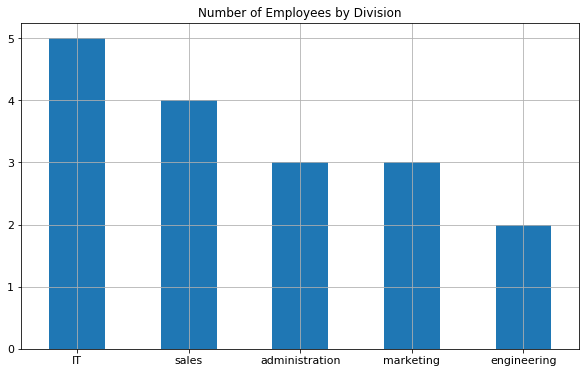

In [8]:
highest_num_by_dept.plot(kind='bar', figsize=(10,6), title='Number of Employees by Division', \
                         grid=bool, rot=0, fontsize=11);

### 2. Which employee is the highest paid?

In [9]:
highest_paid = employees['salary'].max()
highest_paid
print('The highest paid salary is', highest_paid)

The highest paid salary is 97450


In [10]:
employees[employees['salary'] == 97450]

,fname,lname,division,salary,phone_number,contract_type
3976,uche,williams,marketing,97450,7366375,permanent


In [11]:
print('The highest paid employee has a Permanent Contract and is in the Marketing Division earning',highest_paid)

The highest paid employee has a Permanent Contract and is in the Marketing Division earning 97450


## Below is a shorter and better way to do it, but you decide which you prefer.

In [12]:
employees[employees['salary'] == employees['salary'].max()]

,fname,lname,division,salary,phone_number,contract_type
3976,uche,williams,marketing,97450,7366375,permanent


### 3. How many people are on internship?

In [13]:
interns = employees[employees['contract_type'] =='internship']
interns

,fname,lname,division,salary,phone_number,contract_type
908,john,wick,administration,18904,7366098,internship
567,oluchi,amadi,marketing,74980,7366542,internship
64329,conrad,lilo,administration,18000,7366989,internship


In [14]:
print('There are a total of ' + str(len(interns)) + ' interns.')

There are a total of 3 interns.


### 4. How many people earn below 30k that are either temporary or permanent staff?

In [15]:
temp_perm = ['temporary', 'permanent']
below_thirty = employees[(employees['salary'] < 30000) & (employees['contract_type'].isin(temp_perm))]
below_thirty

,fname,lname,division,salary,phone_number,contract_type
123,patrick,eze,sales,21665,7366578,permanent
435,nneka,elizabeth,administration,12480,7366511,permanent
111,promise,ejimi,IT,15000,7366798,temporary
012,chikaodi,steve,IT,26960,7366001,permanent
888,lopez,benjamin,IT,3000,7366222,temporary


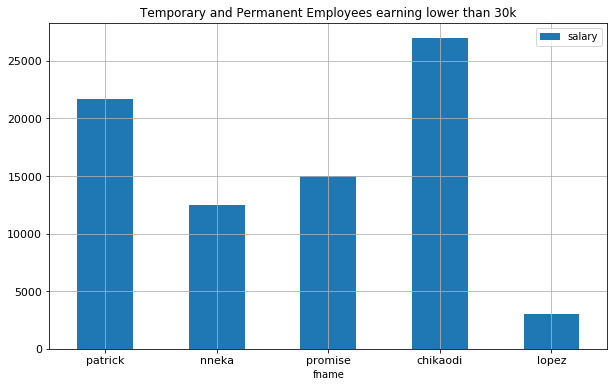

In [16]:
below_thirty.plot(x = 'fname', y = 'salary', kind='bar', grid=bool, figsize=(10,6), \
                  title='Temporary and Permanent Employees earning lower than 30k', \
                  rot=0, fontsize=11);

### 5. Find out the lowest and highest paid in each division.

### a.)  Lowest and Highest in IT

In [17]:
all_divisions = employees.groupby('division')
lowest_IT = all_divisions.get_group('IT').min()
lowest_IT

fname               amanda
lname             benjamin
division                IT
salary                3000
phone_number       7366001
contract_type    permanent
dtype: object

In [18]:
highest_IT = all_divisions.get_group('IT').max()
highest_IT

fname              promise
lname                steve
division                IT
salary               78000
phone_number       7366798
contract_type    temporary
dtype: object

In [19]:
print('We can see that, the lowest in IT is Amanda Benjamin, she earns ' + str(lowest_IT[3]))
print('We can see that, the highest in IT is Promise Steve, she earns ' + str(highest_IT[3]))

We can see that, the lowest in IT is Amanda Benjamin, she earns 3000
We can see that, the highest in IT is Promise Steve, she earns 78000


### b.) Lowest and Highest in sales

In [20]:
lowest_sales = all_divisions.get_group('sales').min()
lowest_sales

fname                chuka
lname              ejiofor
division             sales
salary               21665
phone_number       7366004
contract_type    permanent
dtype: object

In [21]:
highest_sales = all_divisions.get_group('sales').max()
highest_sales

fname              patrick
lname                segun
division             sales
salary               65439
phone_number       7366578
contract_type    temporary
dtype: object

In [22]:
print('We can see that, the lowest in Sales Division is, Chuka Ejiofor. He earns ' + str(lowest_sales[3]))
print('We can see that, the highest in Sales Division is, Patrick Segun. He earns ' + str(highest_sales[3]))

We can see that, the lowest in Sales Division is, Chuka Ejiofor. He earns 21665
We can see that, the highest in Sales Division is, Patrick Segun. He earns 65439


### c.)  Lowest and Highest in Marketing

In [23]:
lowest_marketing = all_divisions.get_group('marketing').min()
lowest_marketing

fname                edward
lname                 amadi
division          marketing
salary                74980
phone_number        7366375
contract_type    internship
dtype: object

In [24]:
highest_marketing = all_divisions.get_group('marketing').max()
highest_marketing

fname                 uche
lname             williams
division         marketing
salary               97450
phone_number       7366765
contract_type    temporary
dtype: object

In [25]:
print('We can see that, the lowest in Marketing Division is, Edward Amadi. He earns ' + str(lowest_marketing[3]))
print('We can see that, the highest in Sales Division is, Uche Williams. He earns ' + str(highest_marketing[3]))

We can see that, the lowest in Marketing Division is, Edward Amadi. He earns 74980
We can see that, the highest in Sales Division is, Uche Williams. He earns 97450


### d.) Lowest and Highest in Administration

In [26]:
lowest_administration = all_divisions.get_group('administration').min()
lowest_administration

fname                    conrad
lname                 elizabeth
division         administration
salary                    12480
phone_number            7366098
contract_type        internship
dtype: object

In [27]:
highest_administration = all_divisions.get_group('administration').max()
highest_administration

fname                     nneka
lname                      wick
division         administration
salary                    18904
phone_number            7366989
contract_type         permanent
dtype: object

In [28]:
print('We can see that, the lowest in Administration Division (an Intern) is,  Conrad Elizabeth. she earns ' \
      + str(lowest_administration[3]))
print('We can see that, the highest in Sales Division is, Nneka Wick. she earns ' + str(highest_administration[3]))

We can see that, the lowest in Administration Division (an Intern) is,  Conrad Elizabeth. she earns 12480
We can see that, the highest in Sales Division is, Nneka Wick. she earns 18904


### e.) Lowest and Highest in Engineering

In [29]:
lowest_engineering = all_divisions.get_group('engineering').min()
lowest_engineering

fname                 chisom
lname                  benny
division         engineering
salary                 45632
phone_number         7366099
contract_type      permanent
dtype: object

In [30]:
highest_engineering = all_divisions.get_group('engineering').max()
highest_engineering

fname                   kiki
lname                 omeili
division         engineering
salary                 87000
phone_number         7366217
contract_type      temporary
dtype: object

In [31]:
print('We can see that, the lowest in Engineerig Division is, Chisom Benny. He earns ' + str(lowest_engineering[3]))
print('We can see that, the highest in Engineering Division is, Kiki Omeili. She earns ' + str(highest_engineering[3]))

We can see that, the lowest in Engineerig Division is, Chisom Benny. He earns 45632
We can see that, the highest in Engineering Division is, Kiki Omeili. She earns 87000
